In [1499]:
import pandas as pd
import io
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.decomposition import PCA

In [1500]:
all_data=pd.read_csv("Mortality_09_UP.data",nrows=25175)

C:\Users\User\AppData\Local\Temp\ipykernel_2196\251105449.py:1: DtypeWarning: Columns (16,17,18,22,23,24,25,26,27,28,29,30,31,32,33,76) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data=pd.read_csv("Mortality_09_UP.data",nrows=25175)


In [1501]:
all_data

,id,m_id,client_m_id,hl_id,house_no,house_hold_no,state,district,rural,stratum_code,...,householdstatus,isheadchanged,fidh,fidx,as,wt,x,schedule_id,year,v126
0,712232,375.0,NaN,2944.0,63,3,9,58,1,1,...,NaN,NaN,NaN,2.944096e+10,-0.630351,68.37,NaN,4,1,NaN
1,712240,383.0,NaN,2997.0,28,1,9,58,1,1,...,NaN,NaN,NaN,2.997096e+10,-4.369212,68.37,NaN,4,1,NaN
2,109886,246.0,NaN,NaN,58,1,9,62,1,2,...,1.0,1.0,9.620340e+13,NaN,NaN,20.95,NaN,4,3,NaN
3,712216,359.0,NaN,2706.0,196,1,9,58,1,1,...,NaN,NaN,NaN,2.706096e+10,-2.996541,68.37,NaN,4,1,NaN
4,712224,367.0,NaN,2777.0,253,1,9,58,1,1,...,NaN,NaN,NaN,2.777096e+10,-3.951137,68.37,NaN,4,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25170,643135,410.0,401.0,6366.0,244,1,9,3,1,2,...,NaN,NaN,NaN,6.366090e+10,5.052841,54.85,NaN,4,1,NaN
25171,643143,938.0,1009.0,6483.0,66,1,9,3,1,2,...,NaN,NaN,NaN,6.483090e+10,0.292205,54.85,NaN,4,1,NaN
25172,102148,38.0,NaN,NaN,56,1,9,61,2,0,...,1.0,2.0,9.610740e+13,NaN,NaN,54.00,NaN,4,3,NaN
25173,643119,394.0,385.0,6140.0,34,1,9,3,1,2,...,NaN,NaN,NaN,6.140090e+10,-2.376460,54.85,NaN,4,1,NaN


In [1502]:
columns = ["age","sex", "highest_qualification", "rural", "disability_status", "is_water_filter", "chew", "smoke", "alcohol","treatment_source"]
death = all_data[columns].copy()

In [1503]:
for column in columns:
    death[column].fillna(death[column].mode()[0], inplace=True)


In [1504]:
death.columns

Index(['age', 'sex', 'highest_qualification', 'rural', 'disability_status',
       'is_water_filter', 'chew', 'smoke', 'alcohol', 'treatment_source'],
      dtype='object')

In [1505]:
death.isnull().sum()

age                      0
sex                      0
highest_qualification    0
rural                    0
disability_status        0
is_water_filter          0
chew                     0
smoke                    0
alcohol                  0
treatment_source         0
dtype: int64

In [1506]:
death

,age,sex,highest_qualification,rural,disability_status,is_water_filter,chew,smoke,alcohol,treatment_source
0,43.0,1.0,4.0,1,0.0,2.0,7.0,4.0,4.0,0.0
1,70.0,2.0,0.0,1,0.0,2.0,5.0,4.0,4.0,9.0
2,57.0,2.0,3.0,1,0.0,2.0,7.0,4.0,4.0,0.0
3,50.0,1.0,0.0,1,0.0,2.0,1.0,1.0,1.0,9.0
4,65.0,2.0,0.0,1,0.0,2.0,7.0,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25170,38.0,1.0,4.0,1,0.0,2.0,3.0,4.0,4.0,9.0
25171,38.0,2.0,0.0,1,0.0,2.0,7.0,4.0,4.0,8.0
25172,42.0,1.0,0.0,2,0.0,2.0,1.0,1.0,4.0,6.0
25173,35.0,1.0,0.0,1,0.0,2.0,7.0,1.0,4.0,8.0


In [1507]:
death.dtypes

age                      float64
sex                      float64
highest_qualification    float64
rural                      int64
disability_status        float64
is_water_filter          float64
chew                     float64
smoke                    float64
alcohol                  float64
treatment_source         float64
dtype: object

In [1508]:
x=death.drop('age',axis=1)
y=death['age']

In [1509]:
x.shape

(25175, 9)

In [1510]:
x.dtypes

sex                      float64
highest_qualification    float64
rural                      int64
disability_status        float64
is_water_filter          float64
chew                     float64
smoke                    float64
alcohol                  float64
treatment_source         float64
dtype: object

In [1511]:
y.shape

(25175,)

In [1512]:
#train-test split
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(x,y ,random_state=104,test_size=0.25,shuffle=True)

In [1513]:
X_train.shape

(18881, 9)

In [1514]:
import tensorflow as tf


In [1515]:
#Build model

model=tf.keras.Sequential()

In [1516]:
# bias=tf.keras.initializers.HeNormal()

# model.add(tf.keras.layers.Dense(10,kernel_initializer="he_normal",use_bias=True,activation='sigmoid',bias_initializer=bias,input_shape=(9,)))
# model.add(tf.keras.layers.Dense(20,kernel_initializer="he_normal",use_bias=True,activation='softmax',bias_initializer=bias))
# model.add(tf.keras.layers.Dense(1,kernel_initializer="he_normal",use_bias=True,activation='leaky_relu',bias_initializer=bias,input_shape=(9,)))

In [1517]:
# bias=tf.keras.initializers.HeNormal()

# model.add(tf.keras.layers.Dense(10,kernel_initializer="he_normal",use_bias=True,activation='sigmoid',bias_initializer=bias,input_shape=(9,)))
# model.add(tf.keras.layers.Dense(20,kernel_initializer="he_normal",use_bias=True,activation='softmax',bias_initializer=bias))
# model.add(tf.keras.layers.Dense(1,kernel_initializer="he_normal",use_bias=True,activation='sigmoid',bias_initializer=bias,input_shape=(9,)))

In [1518]:
import tensorflow as tf

bias=tf.keras.initializers.HeNormal()

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, kernel_initializer="he_normal", bias_initializer=bias, activation='sigmoid', input_shape=(9,)),
  tf.keras.layers.Dense(20, kernel_initializer="he_normal", bias_initializer=bias, activation='relu'),
  tf.keras.layers.Dense(1, kernel_initializer="he_normal", bias_initializer=bias, activation='swish', input_shape=(9,))
])


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [1519]:
model.summary()

Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_163 (Dense)           (None, 10)                100       
                                                                 
 dense_164 (Dense)           (None, 20)                220       
                                                                 
 dense_165 (Dense)           (None, 1)                 21        
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [1520]:
# model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss=tf.keras.losses.MeanAbsoluteError(),metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [1521]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss=tf.keras.losses.MeanAbsoluteError(),metrics=[tf.keras.metrics.RootMeanSquaredError() , 'accuracy'])

In [1522]:
learning=model.fit(X_train,y_train,epochs=20,batch_size=16,verbose=True)

Epoch 1/20
1181/1181 [==============================] - 5s 2ms/step - loss: 12.8052 - root_mean_squared_error: 15.7190 - accuracy: 5.2963e-05
Epoch 2/20
1181/1181 [==============================] - 2s 2ms/step - loss: 12.5055 - root_mean_squared_error: 15.2362 - accuracy: 5.2963e-05
Epoch 3/20
1181/1181 [==============================] - 2s 2ms/step - loss: 12.4578 - root_mean_squared_error: 15.1519 - accuracy: 5.2963e-05
Epoch 4/20
1181/1181 [==============================] - 2s 1ms/step - loss: 12.4641 - root_mean_squared_error: 15.1765 - accuracy: 5.2963e-05
Epoch 5/20
1181/1181 [==============================] - 2s 2ms/step - loss: 12.4620 - root_mean_squared_error: 15.1349 - accuracy: 5.2963e-05
Epoch 6/20
1181/1181 [==============================] - 2s 2ms/step - loss: 12.4672 - root_mean_squared_error: 15.1532 - accuracy: 5.2963e-05
Epoch 7/20
1181/1181 [==============================] - 2s 2ms/step - loss: 12.4002 - root_mean_squared_error: 15.0721 - accuracy: 5.2963e-05
Epoch 

In [1523]:
import matplotlib.pyplot as plt

In [1524]:
def plot(learning):
  plt.plot(learning.history['loss'])
  plt.xlabel("epochs")
  plt.ylabel("Cost")

  plt.show()


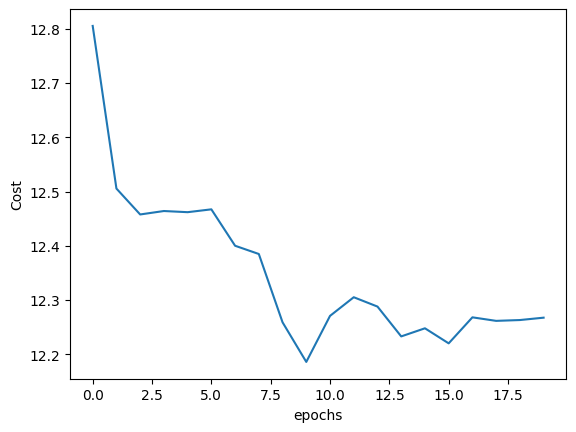

In [1525]:
plot(learning)

In [1526]:
model.weights

[<tf.Variable 'dense_163/kernel:0' shape=(9, 10) dtype=float32, numpy=
 array([[  1.9352542 ,   0.7197234 ,   3.0392404 ,   2.3801122 ,
           4.0455027 ,   3.696931  ,  -0.14629205,  -2.8006995 ,
           3.003626  ,   4.6234837 ],
        [  0.86438274,   8.43592   ,   0.88968617,   0.85620666,
          -6.8249273 ,   1.2279513 , -27.981796  ,  -3.7099302 ,
           1.3781626 ,  -8.130184  ],
        [  0.69436985,   2.4366472 ,   3.7019212 ,   1.8245829 ,
          -2.0766473 ,   2.4924905 ,  -6.120029  ,  -2.1629248 ,
           3.417669  ,  10.254252  ],
        [  4.1349077 ,   3.4875617 ,   2.7858832 ,   0.9486501 ,
          36.702976  ,   2.1533172 ,   2.0786474 ,  -0.47557655,
           1.4526335 ,  25.074354  ],
        [  2.7575166 ,   3.7399511 ,   3.9097717 ,   3.2379096 ,
          -3.018517  ,   3.3472412 ,  -5.5255127 ,  -3.3600318 ,
           4.0415697 ,   1.426836  ],
        [  0.9847406 ,   4.9442396 ,   1.6394681 ,   0.4183011 ,
           3.8402014 ,  

In [1527]:
import joblib

joblib.dump(model,"model2.pkl")

['model2.pkl']

In [1528]:
#loading
p_model=joblib.load("model2.pkl")

In [1529]:
p_model.summary()

Model: "sequential_82"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_163 (Dense)           (None, 10)                100       
                                                                 
 dense_164 (Dense)           (None, 20)                220       
                                                                 
 dense_165 (Dense)           (None, 1)                 21        
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [1530]:
p_model.predict(X_test)

197/197 [==============================] - 0s 1ms/step


array([[45.252632],
       [45.252632],
       [45.252632],
       ...,
       [45.252632],
       [45.252632],
       [45.252632]], dtype=float32)

In [1531]:
jsonfile=model.to_json()
with open ("model.json","w") as f:
  f.write(jsonfile)

model.save_weights("model.h5")

In [1532]:
y_test

20762    32.0
21484    41.0
9865     58.0
18947    24.0
24667    21.0
         ... 
5470     24.0
1596     38.0
18804    62.0
13861    51.0
11589    38.0
Name: age, Length: 6294, dtype: float64

In [1535]:
import numpy
a = [4.0 , 0 , 0 , 7 , 4]
b = [0.0 , 9 , 0 , 5 , 4]
a = numpy.array(a)

In [1536]:
p_model.predict(a)

ValueError: in user code:

    File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_82' (type Sequential).
    
    Input 0 of layer "dense_163" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_82' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=False
      • mask=None
